# MoodSync: Your Emotion-Driven Spotify Player

Discover MoodSync, an innovative AI-powered Spotify player that tunes into your emotions. With advanced emotion recognition technology, MoodSync instantly analyzes your mood and generates personalized Spotify playlists that perfectly match your emotions. Elevate your music experience and immerse yourself in tracks that resonate with your feelings, whether you're feeling upbeat, relaxed, or nostalgic. Say hello to an intuitive and personalized music journey with MoodSync.

**Key Features:**
- Emotion-Driven Playlists
- Real-Time Mood Analysis
- Seamless Spotify Integration
- Intuitive User Interface
- Personalized Music Recommendations

#### Experience the future of music curation with MoodSync and let your emotions lead the way!

### Importing libraries and modules 

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import json
import spotipy
import webbrowser
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
from livelossplot.inputs.tf_keras import PlotLossesCallback
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.13.0


- I have imported json as i need to save the model after training in json format. Moreover i used spotipy which is used for spoify api and integration which can be generated using spotify deveoper site . 
- You can check it out and have fun with your spotify client id and client secret. 
- I imported webbrowser as the model not only just fetch the playlist and display , but also it playlost URI and redirect the user to the particular spotify playlist. If the spotify is predownloaded in system , then the playlist will open in spotify app else it will open in your rediected browser. 
- I used tensorflow with keras in order to train the model. I used adam optimizer which suits best for this project.  

### Importing every folder in train section and printing number of training images

In [6]:
for expression in os.listdir("D:/CSE_code/DATASETS/facial_expression/train/"):
    print(str(len(os.listdir("D:/CSE_code/DATASETS/facial_expression/train/" + expression))) + " " + expression + " images")

3995 angry images
436 disgust images
4097 fear images
7215 happy images
4965 neutral images
4830 sad images
3171 surprise images


### Integrating the data into categorical form

In [7]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("D:/CSE_code/DATASETS/facial_expression/train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("D:/CSE_code/DATASETS/facial_expression/train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28709 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.


## Initializing the CNN model

In [8]:
model = Sequential()
# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flattening
model.add(Flatten())
# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

- In the CNN (convolutional neural network) we took 4 convolutional layer with relu activation function, max pooling of size (2,2). 
- As we took batch size , we have taken batch normalization in every convolutional layer. 
- After that , we used flattening layer which will flatten our model. 
- Next, we took 2 fully connected layers 1st with 256 neurons and the 2nd with 512 neurons with activation function of relu and dropout of 0.25.
- At last we added a softmax function to reduce the noise.
- In this model we took adam optimizer with learning rate of 0.0005.
- Finally we compiled the model with these categories and printed the summary of the model. 

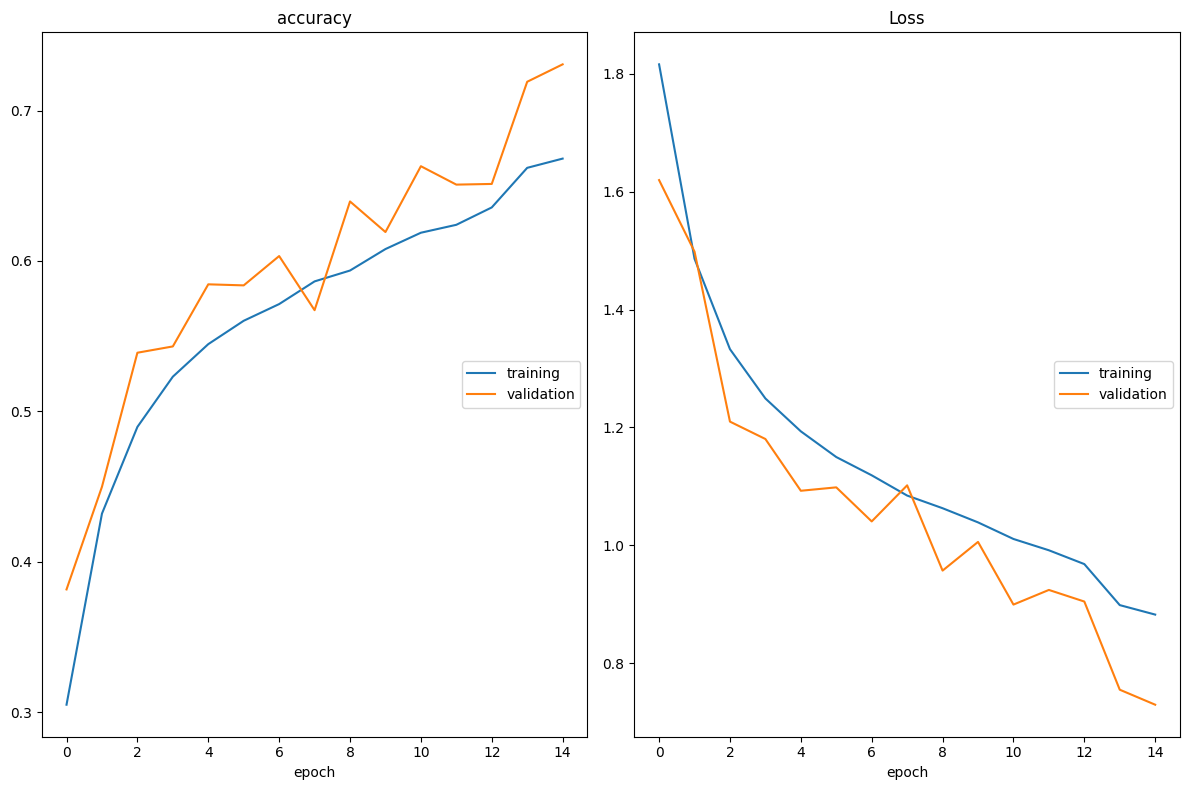

accuracy
	training         	 (min:    0.305, max:    0.668, cur:    0.668)
	validation       	 (min:    0.382, max:    0.731, cur:    0.731)
Loss
	training         	 (min:    0.883, max:    1.816, cur:    0.883)
	validation       	 (min:    0.730, max:    1.620, cur:    0.730)

Epoch 15: saving model to model_weights.h5
448/448 [==============================] - 692s 2s/step - loss: 0.8826 - accuracy: 0.6681 - val_loss: 0.7298 - val_accuracy: 0.7307 - lr: 5.0000e-05
CPU times: total: 8h 12min 25s
Wall time: 2h 53min 1s


In [23]:
%%time
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

Here we trained the model with above mentioned characteristics and saved the model as model.json and its updated weights as model_weights.h5. Here we can see that our model is providing with 66% accuracy. Not too good but not too bad. I have taken 15 epochs , hence in order to improve the model accuracy, It can be increased.

In [9]:
model_json = model.to_json()
model.save_weights('model_weights.h5')
with open("model.json", "w") as json_file:
    json_file.write(model_json)

- Now our model is trained and saved along with its updated weights.
- Hence , we need to set up the camera and test for the gestures and also along side we will setup our spotify and integrate it with our model.

### Created Facial Expression model class

In [10]:
from tensorflow.keras.models import model_from_json
class FacialExpressionModel(object):
    EMOTIONS_LIST = ["Angry", "Disgust",
                    "Fear", "Happy",
                    "Neutral", "Sad",
                    "Surprise"]
    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)
        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model.make_predict_function()
    def predict_emotion(self, img):
        self.preds = self.loaded_model.predict(img)
        return FacialExpressionModel.EMOTIONS_LIST[np.argmax(self.preds)]

This class will take the object as an argument. 
- Main function of this class is to nuild the emotion list , Extract the model from json format , read the model.
- The second function predicts the emotion on the basis of the prediction returned by the model .

In [11]:
import cv2
global label
facec = cv2.CascadeClassifier('D:/CSE_code/DATASETS/facial_expression/haarcascade_frontalface_default.xml')
model = FacialExpressionModel("D:/CSE_code/DATASETS/facial_expression/model.json", "D:/CSE_code/DATASETS/facial_expression/model_weights.h5")
font = cv2.FONT_HERSHEY_SIMPLEX
class VideoCamera(object):
    def __init__(self):
        self.video = cv2.VideoCapture(0)
    def __del__(self):
        self.video.release()
    # returns camera frames along with bounding boxes and predictions
    def get_frame(self):
        _, fr = self.video.read()
        gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
        faces = facec.detectMultiScale(gray_fr, 1.3, 5)
        for (x, y, w, h) in faces:
            fc = gray_fr[y:y+h, x:x+w]
            roi = cv2.resize(fc, (48, 48))
            pred = model.predict_emotion(roi[np.newaxis, :, :, np.newaxis])
            cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
            cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)
            if cv2.waitKey(1) & 0xFF == ord('s'):
                label = pred
                play(label)
                print(label)
        return fr

This class basically handles the Camera and draws the square over the face and return print the predicted expression over the box.
- This calls the other function play which will take the predicted emotion in real time and redirect to the particular playlist.

## Spotify setup and Integration

In [12]:
username = 'stgmwq5ihtgmy99iw7rk0onjj'
clientID = 'c2f2b4bf40544be4b4a231d963c6325c'
clientSecret = '90d3f21000fa45f49752b3a3e38f110e'
redirect_uri = 'http://google.com/callback/'

I have took the redirected uri as 'http://google.com/callback/' as it uses the google for redirect purposes.
- Make sure you write the same redirect uri as you write in spotify developer project.

In [13]:
oauth_object = spotipy.SpotifyOAuth(clientID, clientSecret, redirect_uri)
token_dict = oauth_object.get_access_token()
token = token_dict['access_token']
spotifyObject = spotipy.Spotify(auth=token)
user_name = spotifyObject.current_user()
  
# To print the response in readable format.
print(json.dumps(user_name, sort_keys=True, indent=4))

C:\Users\Prajjwal Chauhan\AppData\Local\Temp\ipykernel_17272\907563455.py:2: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_dict = oauth_object.get_access_token()


{
    "display_name": "ANKUSH NEGI",
    "external_urls": {
        "spotify": "https://open.spotify.com/user/stgmwq5ihtgmy99iw7rk0onjj"
    },
    "followers": {
        "href": null,
        "total": 0
    },
    "href": "https://api.spotify.com/v1/users/stgmwq5ihtgmy99iw7rk0onjj",
    "id": "stgmwq5ihtgmy99iw7rk0onjj",
    "images": [
        {
            "height": 64,
            "url": "https://i.scdn.co/image/ab67757000003b82f26fdf3af439bcbbd987c61e",
            "width": 64
        },
        {
            "height": 300,
            "url": "https://i.scdn.co/image/ab6775700000ee85f26fdf3af439bcbbd987c61e",
            "width": 300
        }
    ],
    "type": "user",
    "uri": "spotify:user:stgmwq5ihtgmy99iw7rk0onjj"
}


- A general setup for spotipy. It takes the client id, client secret, redirect uri in oath object.
- It gets the access token. Remember the spotify will ask for the access permission.
- After all this, the code will redirect you to new link to get access. If already given access, then it will generate the json file of your account. If not then it will ask for the link to which you were redirected now.

In [14]:
def play(mood):
    if mood == 'Angry':
        song = 'https://open.spotify.com/playlist/37i9dQZF1EIgNZCaOGb0Mi?si=9cd00a9874124523'
        
    elif mood == 'Disgust':
        song = 'https://open.spotify.com/album/580A6nn3HTfoqJGmPgCRum?si=usttXe_oT2W4XGu6VvTZEA'
        
    elif mood == 'Fear':
        song = 'https://open.spotify.com/album/2BWtI3RIIf5V9uXr7B3vQd?si=osDGyD1MRX2VSBu7Y8VOpg'
        
    elif mood == 'Happy':
        song = 'https://open.spotify.com/playlist/0jrlHA5UmxRxJjoykf7qRY?si=d97f5386d2644071'
        
    elif mood == 'Neutral':
        song = 'https://open.spotify.com/album/5V2zxxg2ZQe8cpLlRxsCFr?si=qHHQx5FES9iKIKvKuZudqg'
        
    elif mood == 'Sad':
        song = 'https://open.spotify.com/album/71sb3x5BwKk87d7ZBOoSJY?si=0UN2cEOPR8WwSehAYlaRSA'
        
    elif mood == 'Surprise':
        song = 'https://open.spotify.com/playlist/3oiDdYrRCuqu5e4CgwqVkE?si=b008af6a30d942ef'
    
    webbrowser.open(song)

This function is basically the heart of the whole model, as this function takes the mood checks which type of mood it is and then according to mood , it stores the particular playlist / album uri and opens it to your redirected webbrowser.

In [15]:
def gen(camera):
    while True:
        frame = camera.get_frame()
        cv2.imshow('Facial Expression Recognization',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()

gen function is the head of the model . It calls all the classes and functions which were discussed earlier.

### Key controls :
#### 's' to capture the emotion and search for the playlist.
#### 'q' to quit the camera and exit the model.

In [18]:
gen(VideoCamera())

1/1 [==============================] - 0s 36ms/step
Neutral
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step
Happy
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step
Sad
1/1 [==============================] - 0s 28ms/step
Surprise
1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 30ms/step
Neutral
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 36ms/step
Disgust
1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 37ms/step
Disgust
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step
Disgust
1/1 [==============================] - 0s 77ms/step
Angry
1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 27ms/step
Angry
1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 47ms/step
Angry
1/1 [==============================] - 0s 74ms/step
Angry
1/1 [==============================] - 0s 127ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 43ms/step
Fear
1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 36ms/step


The model recognizes every single frame of your emotion.